In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

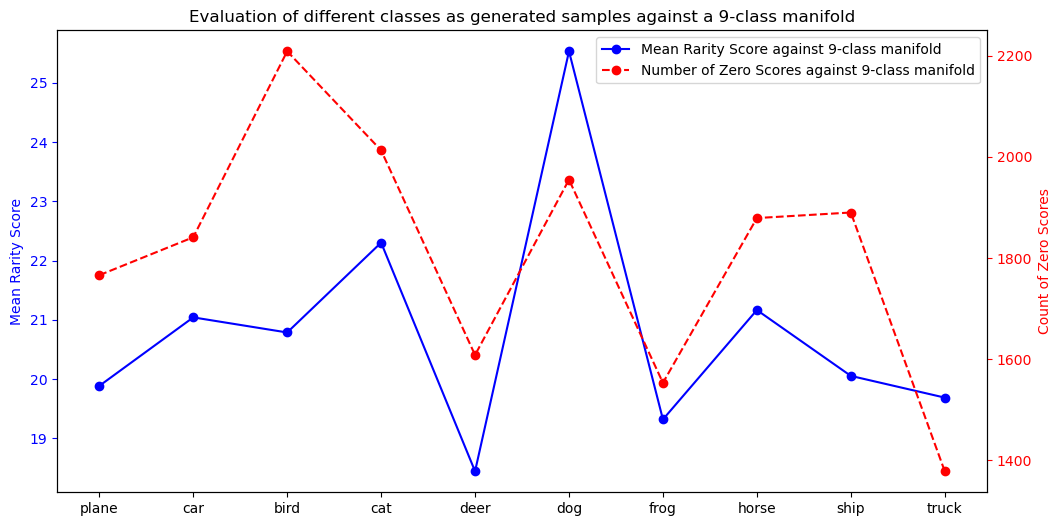

20.819963089383673
[19.882884498978633, 21.03976348425104, 20.784657701135547, 22.301686433451785, 18.44092698028045, 25.533087173020768, 19.31641216611365, 21.163644791938285, 20.05164140684515, 19.68492625782142]
[1766, 1841, 2209, 2013, 1608, 1955, 1553, 1879, 1890, 1378]


In [2]:
mean_scores_reamin = []
zero_scores_reamin = []
classDict = {'plane': 0, 'car': 1, 'bird': 2, 'cat': 3, 'deer': 4,
             'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
class_names = list(classDict.keys())

for filename in os.listdir('./'):
    if filename.endswith("score.txt"):
        _, classname, _ = filename.split('_')
        # classindex = classname.removesuffix(".txt")
        
        scores = np.loadtxt(filename)
        mean_scores_reamin.append(np.mean(scores[scores!=0]))
        zero_scores_reamin.append(np.sum(scores == 0))
    


# Left y-axis represents the mean score
plt.figure(figsize=(12, 6))
line1, = plt.plot(class_names, mean_scores_reamin, color='b', marker='o', label='Mean Rarity Score against 9-class manifold')
plt.ylabel('Mean Rarity Score', color='b')
plt.tick_params('y', colors='b')

# Second y-axis for the number of zeros
ax2 = plt.twinx()
line2, = ax2.plot(class_names, zero_scores_reamin, color='r', marker='o', linestyle='--', label='Number of Zero Scores against 9-class manifold')
ax2.set_ylabel('Count of Zero Scores', color='r')
ax2.tick_params('y', colors='r')

plt.title('Evaluation of different classes as generated samples against a 9-class manifold')
plt.xlabel('Generated Class (against other 9 classes)')
plt.xticks(rotation=45)

# Combine legends of both the axes
lines = [line1, line2]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

# plt.tight_layout()

plt.show()

print(np.mean(mean_scores_reamin))
print(mean_scores_reamin)
print(zero_scores_reamin)